# Análise de Recursos Humanos - People Analytics

Este projeto utiliza dados disponibilizados no [Kaggle](https://www.kaggle.com/datasets/2e87aca9cfb969c5d6e89dbba2aba6d7b5a3cb769e43608a247859512197917d) sobre "People Analytics aplicados a RH e CRM". O objetivo é analisar informações de funcionários, avaliações sobre o ambiente de trabalho e outros dados relevantes para identificar perfis de colaboradores propensos a deixar a empresa.

Será empregada a metodologia CRISP-DM, e um modelo preditivo será desenvolvido para identificar os grupos mais propensos ao desligamento, oferecendo insights e sugerindo soluções para os problemas identificados. O foco é reduzir a saída de colaboradores e aprimorar a retenção de talentos.

## Contexto do problema

A _RetailX_, com uma equipe de aproximadamente **4000 funcionários**, enfrenta uma alta **rotatividade anual de cerca de 15%**. Essa taxa de saída, seja por vontade própria ou demissão, é considerada prejudicial pela gestão, devido a:

- Impacto negativo nos prazos, afetando a reputação da empresa perante consumidores e parceiros;
- Necessidade de manter um departamento significativo para recrutamento;
- Requerimento de treinamento e período de adaptação para os novos funcionários.

## Demanda do negócio

- ~~Analisar os dados para identificar padrões de comportamento dos funcionários (obter personas);~~
- ~~Identificar as variáveis que mais influenciam na alta rotatividade dos funcionários;~~
- Calcular a probabilidade de um funcionário deixar a empresa e identificar as variáveis que mais contribuem para esse aumento;
- ~~Elaborar um relatório com as conclusões para que o gestor de RH possa tomar medidas para reduzir a rotatividade.~~

## Compreensão dos dados

Os dados disponíveis incluem quatro arquivos em formato _CSV_ e um arquivo _Excel_ com o dicionário de dados. Para o projeto de análise de recursos humanos (People Analytics), serão utilizados três arquivos que refletem os dados dos funcionários, suas percepções sobre o trabalho e seu impacto em suas vidas, além da avaliação de gestores. Esses dados foram extraídos do dataset publicado no [Kaggle](https://www.kaggle.com/datasets/2e87aca9cfb969c5d6e89dbba2aba6d7b5a3cb769e43608a247859512197917d) sob o título "People Analytics aplicados a RH e CRM".

## Dicionário de dados

| Variáveis | Descrição | Domínios |
|------------------------------|------------------------------|------------------------------|
| Idade                        | Idade do funcionário | |
| Rotatividade                 | Se o funcionário deixou a empresa no ano anterior ou não | |
| ViagensDeNegocio             | Com que frequência os funcionários viajaram a negócios no último ano | |
| Departamento                 | Departamento na empresa | |
| DistanciaDeCasa              | Distância de casa em quilômetros | |
| Educacao                     | Nível de Educação | 1 'Abaixo do Ensino Superior'<br>2 'Ensino Superior Incompleto'<br>3 'Bacharel'<br>4 'Mestre'<br>5 'Doutor' |
| CampoDeEducacao              | Campo de educação | |
| ContagemDeEmpregados         | Contagem de funcionários | |
| IDDoEmpregado                | Número/ID do funcionário | |
| SatisfacaoComAmbiente        | Nível de Satisfação com o Ambiente de Trabalho | 1 'Baixo'<br>2 'Médio'<br>3 'Alto'<br>4 'Muito Alto' |
| Genero                       | Gênero do funcionário | |
| EnvolvimentoNoTrabalho       | Nível de Envolvimento no Trabalho | 1 'Baixo'<br>2 'Médio'<br>3 'Alto'<br>4 'Muito Alto' |
|                   | Nível do cargo na empresa em uma escala de 1 a 5 | |
|                   | Nome da função na empresa | |
| SatisfacaoNoTrabalho         | Nível de Satisfação no Trabalho | 1 'Baixo'<br>2 'Médio'<br>3 'Alto'<br>4 'Muito Alto' |
| EstadoCivil                  | Estado civil do funcionário | |
| RendaMensal                  | Renda mensal em rúpias por mês | |
| NumeroDeEmpresas             | Número total de empresas pelas quais o funcionário passou | |
| MaiorDe18                    | Se o funcionário é maior de 18 anos ou não | |
| AumentoPercentualSalario     | Percentual de aumento salarial no último ano | |
| AvaliacaoDeDesempenho        | Avaliação de desempenho do último ano | 1 'Baixo'<br>2 'Bom'<br>3 'Excelente'<br>4 'Excepcional' |
| HorasPadrao                  | Horas padrão de trabalho para o funcionário | |
| NivelDeOpcaoDeCompraDeAcoes  | Nível de opção de ações do funcionário | |
| TotalDeAnosTrabalhados       | Número total de anos que o funcionário trabalhou até agora | |
| TreinamentosNoUltimoAno      | Número de vezes que treinamentos foram realizados para este funcionário no último ano | |
| EquilibrioTrabalhoVida       | Nível de equilíbrio entre trabalho e vida pessoal   | 1 'Ruim'<br>2 'Bom'<br>3 'Melhor'<br>4 'Ótimo' |
| AnosNaEmpresa                | Número total de anos que o funcionário passou na empresa | |
| AnosDesdeUltimaPromocao      | Número de anos desde a última promoção | |
| AnosComAtualGestor           | Número de anos sob o gerente atual | |

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Análise e união dos dataframes**
4. **Análise dos dados**
    - 4.1. Análise das variáveis (tipagem)
    - 4.2. Segmentação das variáveis categóricas e numéricas
5. **Análise das variáveis**
    - 5.1. Análise das variáveis categóricas
    - 5.2. Análise das variáveis numéricas
6. **Obter a propabilidade de um funcionário sair da empresa**


<br>

---

<br>

## 1. Importação de bibliotecas

In [3]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc # Garbage Collector para gerenciamento de memória

from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

# Configurações para exibição de dados no Jupyter Notebook

# Configurar opção de exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a surpressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento das bases

In [4]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 471


In [5]:
# Criando um dataframe a partir do arquivo tb_funcionarios.csv
df_funcionarios = pd.read_csv('dados/tb_funcionarios.csv', sep=',')
print('\nDATAFRAME: df_funcionarios')
df_funcionarios.head()


DATAFRAME: df_funcionarios


,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,NumeroDeEmpresas,MaiorDe18,AumentoPercentualSalario,HorasPadrao,NivelDeOpcaoDeCompraDeAcoes,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
# Criando um dataframe a partir do arquivo tb_pesquisa_funcionarios.csv
df_pesquisa_funcionarios=pd.read_csv('dados/tb_pesquisa_funcionarios.csv',sep=',')
print('\nDATAFRAME: df_pesquisa_funcionarios')
df_pesquisa_funcionarios.head()


DATAFRAME: df_pesquisa_funcionarios


,IDDoEmpregado,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
# Criando um dataframe a partir do arquivo tb_pesquisa_gestores.csv
df_pesquisa_gestores = pd.read_csv('dados/tb_pesquisa_gestores.csv', sep=',')
print('\nDATAFRAME: df_pesquisa_gestores')
df_pesquisa_gestores.head()


DATAFRAME: df_pesquisa_gestores


,IDDoEmpregado,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


## 3. Análise e união dos dataframes

In [8]:
# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_funcionarios': df_funcionarios,
    'df_pesquisa_funcionarios': df_pesquisa_funcionarios,
    'df_pesquisa_gestores': df_pesquisa_gestores
}

# Criação da tabela
table = PrettyTable()
table.title = 'VOLUMETRIA'
table.field_names = ['DataFrame', 'Quantidade de Linhas', 'Quantidade de Colunas']
table.align['DataFrame'] = 'l'

# Iteração sobre o dicionário para adicionar as dimensões dos dataframes à tabela
for nome, dataframe in dfs.items():
    table.add_row([nome, dataframe.shape[0], dataframe.shape[1]])

print(table)

+-------------------------------------------------------------------------+
|                                VOLUMETRIA                               |
+--------------------------+----------------------+-----------------------+
| DataFrame                | Quantidade de Linhas | Quantidade de Colunas |
+--------------------------+----------------------+-----------------------+
| df_funcionarios          |         4410         |           24          |
| df_pesquisa_funcionarios |         4410         |           4           |
| df_pesquisa_gestores     |         4410         |           3           |
+--------------------------+----------------------+-----------------------+


In [9]:
# Unindo df_funcionarios com df_pesquisa_funcionarios
df_merged = pd.merge(df_funcionarios, df_pesquisa_funcionarios, on='IDDoEmpregado', how='left')

# Unindo o resultado com df_pesquisa_gestores
df = pd.merge(df_merged, df_pesquisa_gestores, on='IDDoEmpregado', how='left')

# Criação da coluna 'TARGET' com base na coluna 'Rotatividade'
df['TARGET'] = (df['Rotatividade'] == 'Sim').astype(int)

# Exibindo o dataframe final resultante da junção
df.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho,TARGET
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,6,1,0,0,3.0,4.0,2.0,3,3,0
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,3,5,1,4,3.0,2.0,4.0,2,4,1
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,2,5,0,3,2.0,2.0,1.0,3,3,0
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,5,8,7,5,4.0,4.0,3.0,2,3,0
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,2,6,0,4,4.0,1.0,3.0,3,3,0


In [10]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA')
print(f'\nQuantidade de linhas  (registros): {df.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df.shape[1]}')


VOLUMETRIA

Quantidade de linhas  (registros): 4410
Quantidade de colunas (variáveis): 30


## 4. Análise dos dados

### 4.1. Análise das variáveis (tipagem)

In [11]:
# Listagem de todas as variáveis e a tipagem

lista_vars = pd.DataFrame({
    'Variável': df.columns,
    'Tipo': df.dtypes,
    'Cardinalidade': df.nunique()
})
lista_vars = lista_vars.sort_values(by='Tipo').reset_index(drop=True)
lista_vars

,Variável,Tipo,Cardinalidade
0,TARGET,int32,2
1,EnvolvimentoNoTrabalho,int64,4
2,AnosComAtualGestor,int64,18
3,AnosDesdeUltimaPromocao,int64,16
4,AnosNaEmpresa,int64,37
5,TreinamentosNoUltimoAno,int64,7
6,NivelDeOpcaoDeCompraDeAcoes,int64,4
7,HorasPadrao,int64,1
8,AumentoPercentualSalario,int64,15
9,AvaliacaoDeDesempenho,int64,2


In [12]:
# Atribuição do dataframe com exclusão da coluna 'IDDoEmpregado'
X = df.drop(columns='IDDoEmpregado')

# Exibindo a quantidade de linhas e colunas do dataframe
print(f'\nVOLUMETRIA')
print(f'\nQuantidade de linhas  (registros): {X.shape[0]}')
print(f'Quantidade de colunas (variáveis): {X.shape[1]}')


VOLUMETRIA

Quantidade de linhas  (registros): 4410
Quantidade de colunas (variáveis): 29


### 4.2. Segmentação das variáveis categóricas e numéricas

In [13]:
# Separando em dois dataframes por tipo das variáveis
X_cat = X.select_dtypes(include='object')
X_num = X.select_dtypes(exclude='object')

print(f'\nQuantidade de variáveis categóricas: {X_cat.shape[1]}')
print(f'\nQuantidade de variáveis numéricas:  {X_num.shape[1]}')


Quantidade de variáveis categóricas: 8

Quantidade de variáveis numéricas:  21


In [14]:
# Removendo variáveis categóricas da lista
vars1 = list(X_cat.columns)
vars1.remove('MaiorDe18')
vars1.remove('Rotatividade')

# Lista de variáveis numéricas que categorizam os dados
vars2 = ['SatisfacaoComAmbiente', 'SatisfacaoNoTrabalho', 'EquilibrioTrabalhoVida',
         'EnvolvimentoNoTrabalho', 'AvaliacaoDeDesempenho', 'Educacao']

# Junção das listas 
vars_categoricas = vars1 + vars2

# Ordenando a lista de variáveis
vars_categoricas.sort()

# Criando uma tabela
table = PrettyTable()
table.field_names = ['Variáveis Categóricas']
table.align['Variáveis Categóricas'] = 'l'

# Adicionando linhas à tabela
for var in vars_categoricas:
    table.add_row([var])

print(table)

+------------------------+
| Variáveis Categóricas  |
+------------------------+
| AvaliacaoDeDesempenho  |
| CampoDeEducacao        |
| Departamento           |
| Educacao               |
| EnvolvimentoNoTrabalho |
| EquilibrioTrabalhoVida |
| EstadoCivil            |
| Funcao                 |
| Genero                 |
| SatisfacaoComAmbiente  |
| SatisfacaoNoTrabalho   |
| ViagensDeNegocio       |
+------------------------+


In [15]:
# Removendo variáveis numéricas que categorizam os dados
vars_numericas = list(set(X_num.columns).difference(vars_categoricas, set(
    ['ContagemDeEmpregados', 'Rotatividade', 'MaiorDe18', 'TARGET', 'HorasPadrao', 'IDDoEmpregado'])))

# Ordenando a lista de variáveis
vars_numericas.sort()

# Criando uma tabela
table = PrettyTable()
table.field_names = ['Variáveis Numéricas']
table.align['Variáveis Numéricas'] = 'l'

# Adicionando linhas à tabela
for var in vars_numericas:
    table.add_row([var])

print(table)

+-----------------------------+
| Variáveis Numéricas         |
+-----------------------------+
| AnosComAtualGestor          |
| AnosDesdeUltimaPromocao     |
| AnosNaEmpresa               |
| AumentoPercentualSalario    |
| DistanciaDeCasa             |
| Idade                       |
| NivelDeOpcaoDeCompraDeAcoes |
| NivelDoCargo                |
| NumeroDeEmpresas            |
| RendaMensal                 |
| TotalDeAnosTrabalhados      |
| TreinamentosNoUltimoAno     |
+-----------------------------+


Durante o processo de segmentação das variáveis, foram necessárias inclusões e exclusões em ambos os grupos. A separação das variáveis não pode se basear unicamente na sua tipagem, sendo essencial analisar os dados e a informação que carregam.

No grupo das variáveis categóricas, foram realizados os seguintes ajustes:

- **Inclusão** das variáveis numéricas 'SatisfacaoComAmbiente', 'SatisfacaoNoTrabalho', 'EquilibrioTrabalhoVida', 'EnvolvimentoNoTrabalho','AvaliacaoDeDesempenho' e 'Educacao'. Embora essas variáveis contenham valores numéricos, eles representam categorias, níveis ou pontuações, funcionando como classificadores.
- **Exclusão** da variável 'MaiorDe18', por apresentar um único valor sem variância, não fornecendo informações estatisticamente relevantes.
- **Exclusão** da 'Rotatividade', por ser a variável alvo do estudo, indicando se houve ou não desligamento do colaborador, e portanto, não deve ser incluída na segmentação inicial.

No processo de segmentação das variáveis numéricas, ajustes adicionais foram necessários:

- **Remoção** das variáveis incluídas no grupo de categóricas.
- **Exclusão** das variáveis 'ContagemDeEmpregados', 'HorasPadrao' e 'MaiorDe18', pois possuem valores únicos, sem impacto analítico.
- **Exclusão** das variáveis 'Rotatividade' e 'TARGET', que são as variáveis classificadoras dos funcionários em relação ao desligamento.
- **Remoção** da variável 'IDDoEmpregado', que serve apenas como identificador único de cada funcionário no dataframe.

Esses ajustes são essenciais para garantir que a segmentação das variáveis esteja correta, facilitando as análises subsequente e a criação de modelos preditivos mais precisos.

## 5. Análise das variáveis

### 5.1. Análise das variáveis categóricas

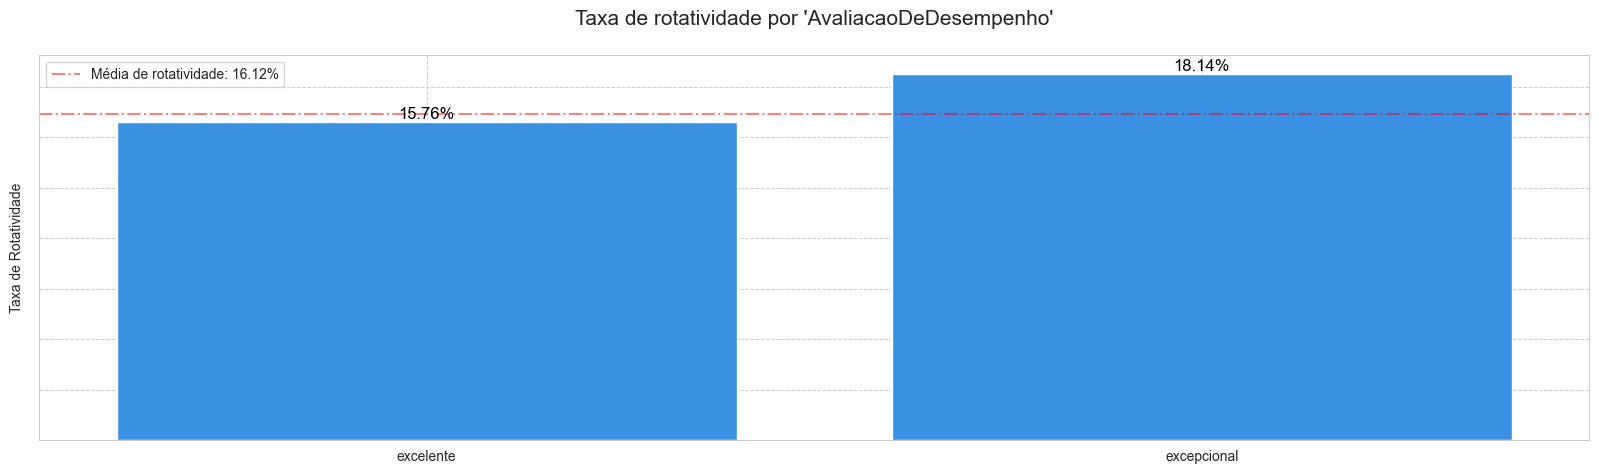

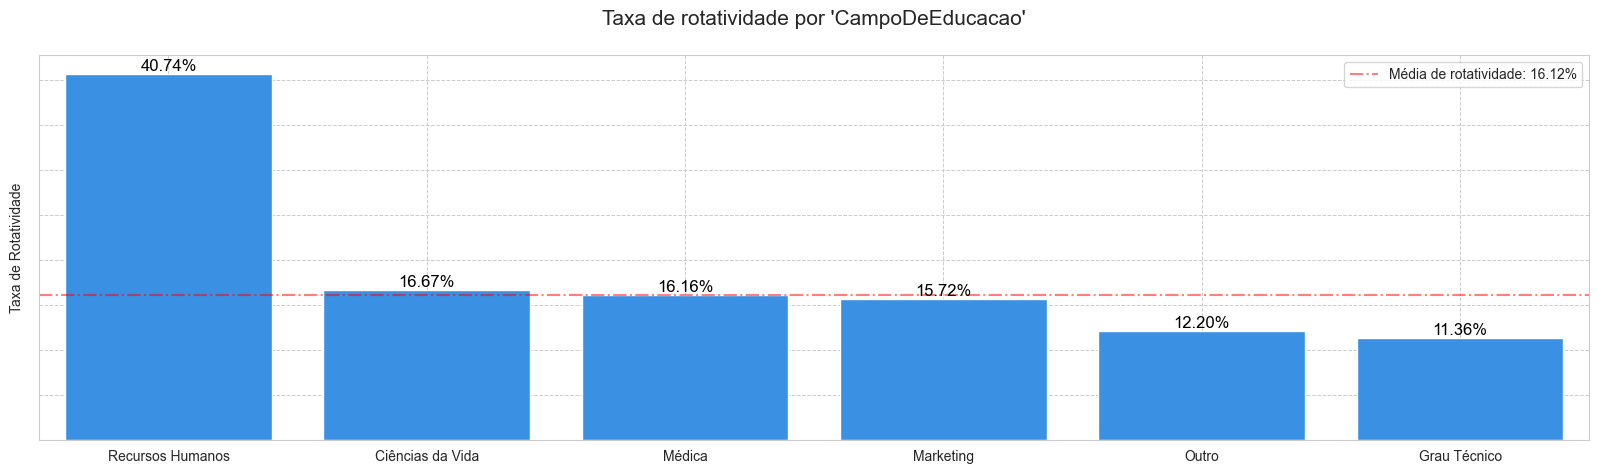

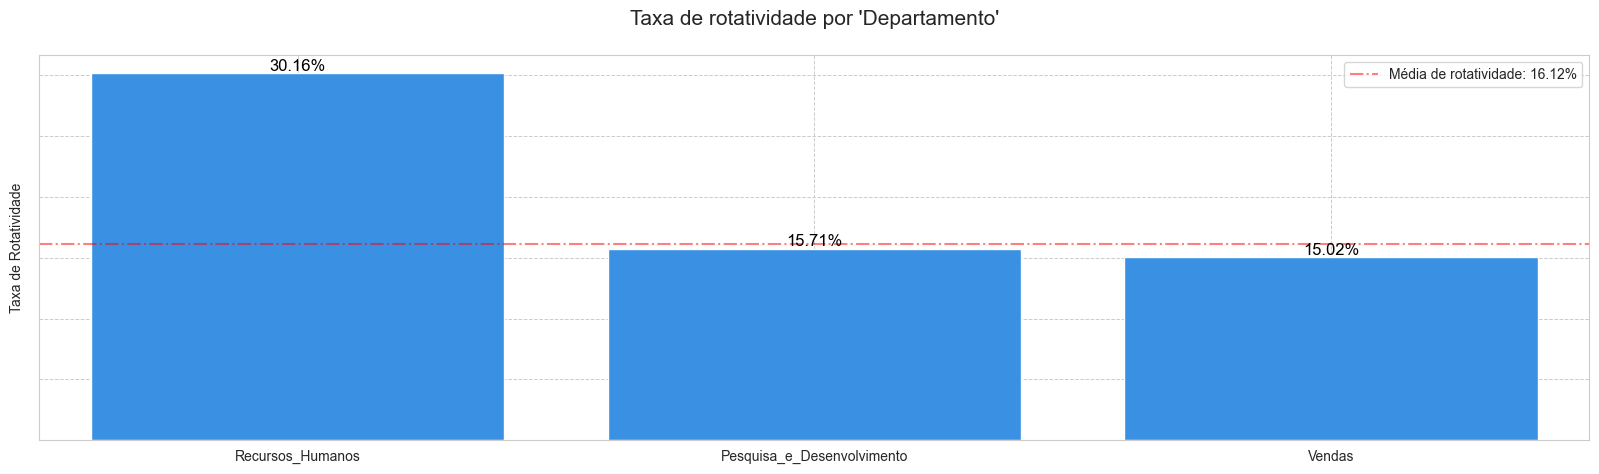

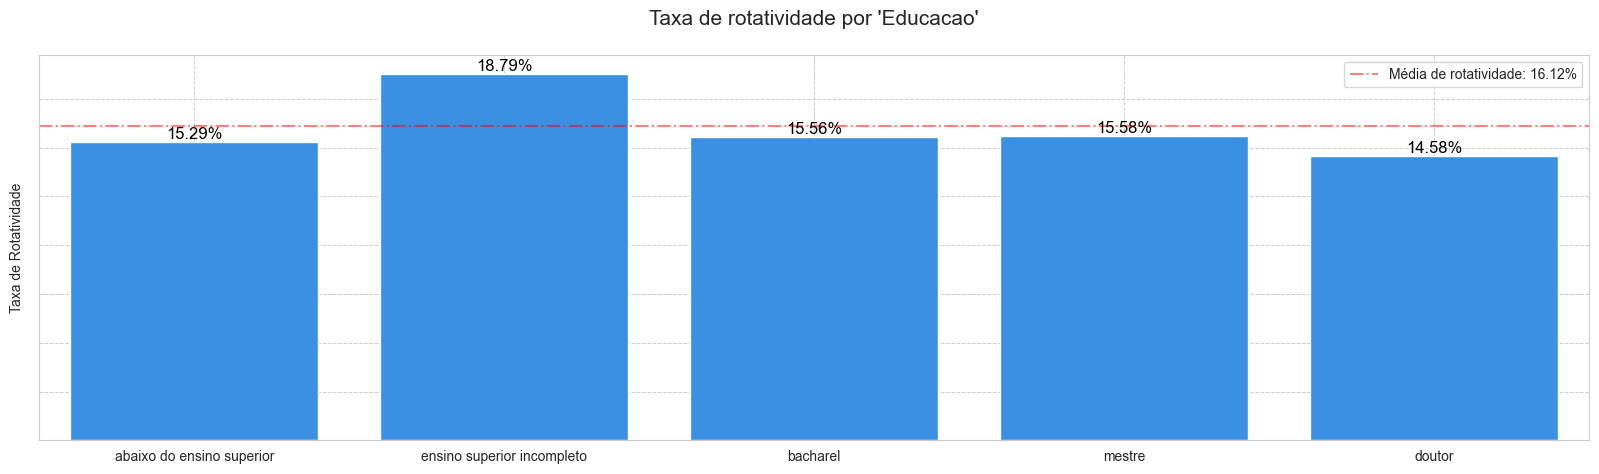

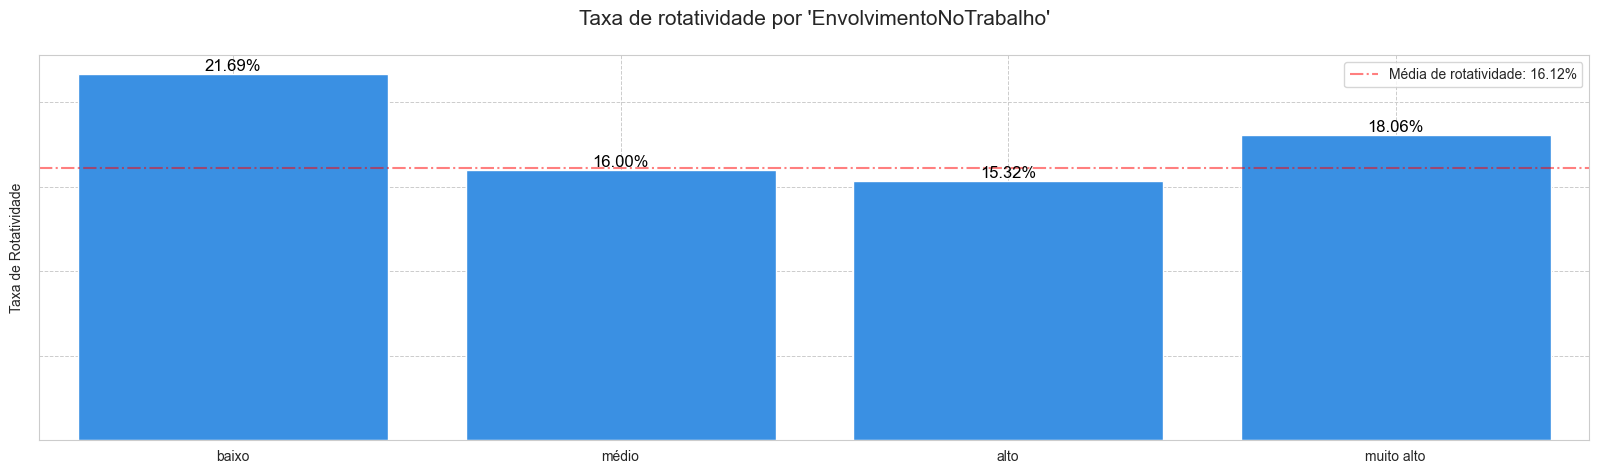

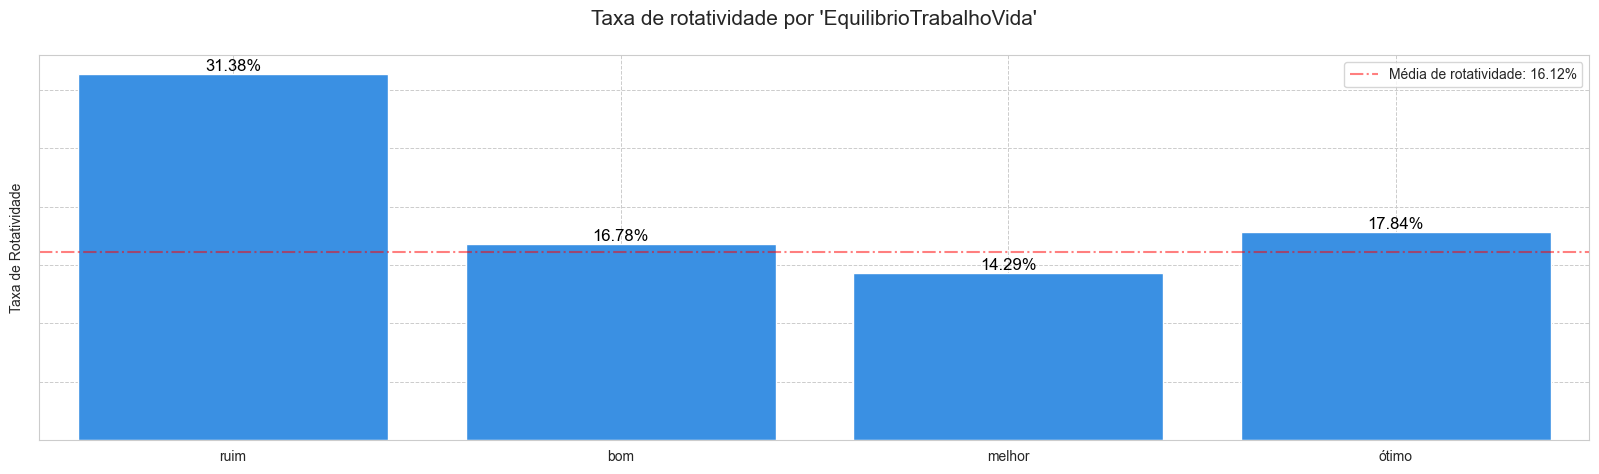

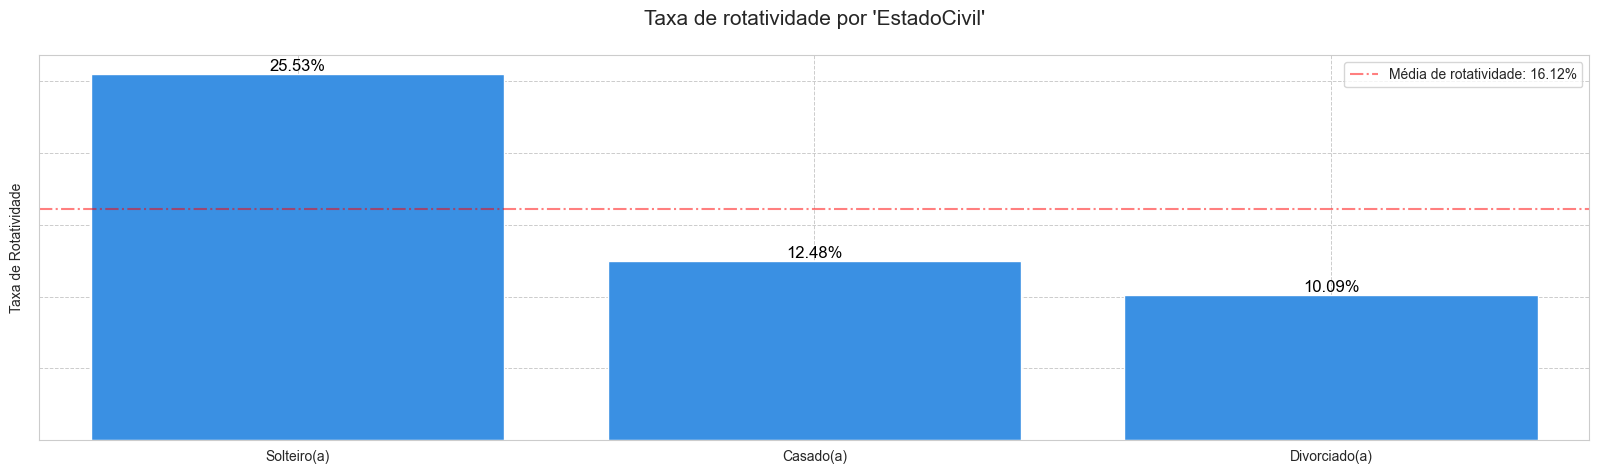

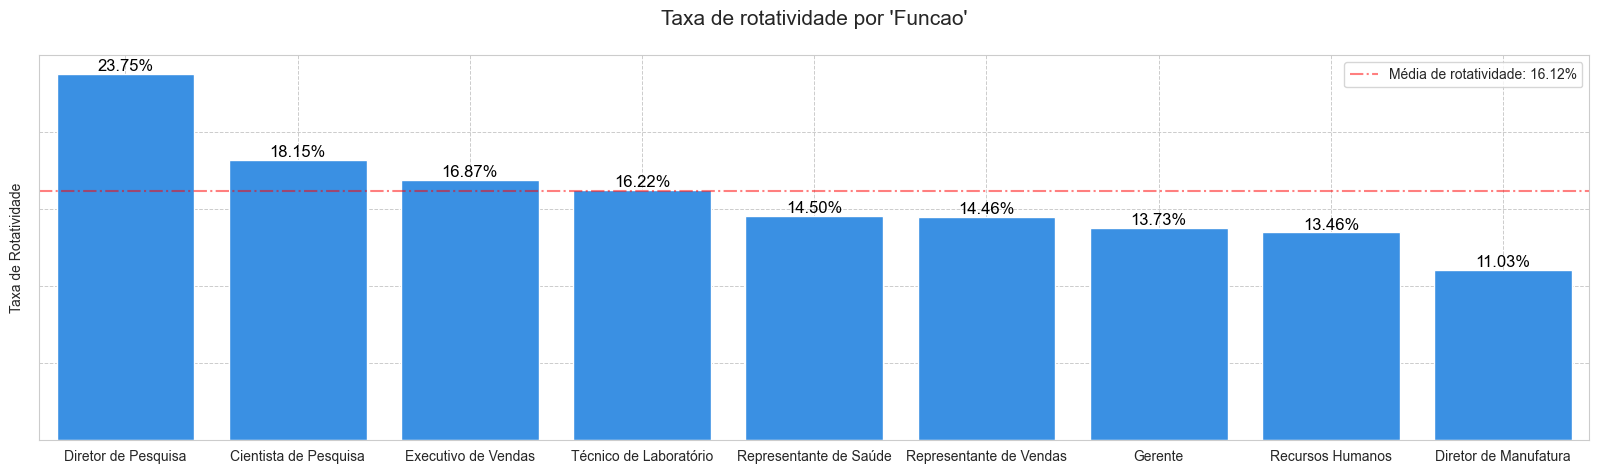

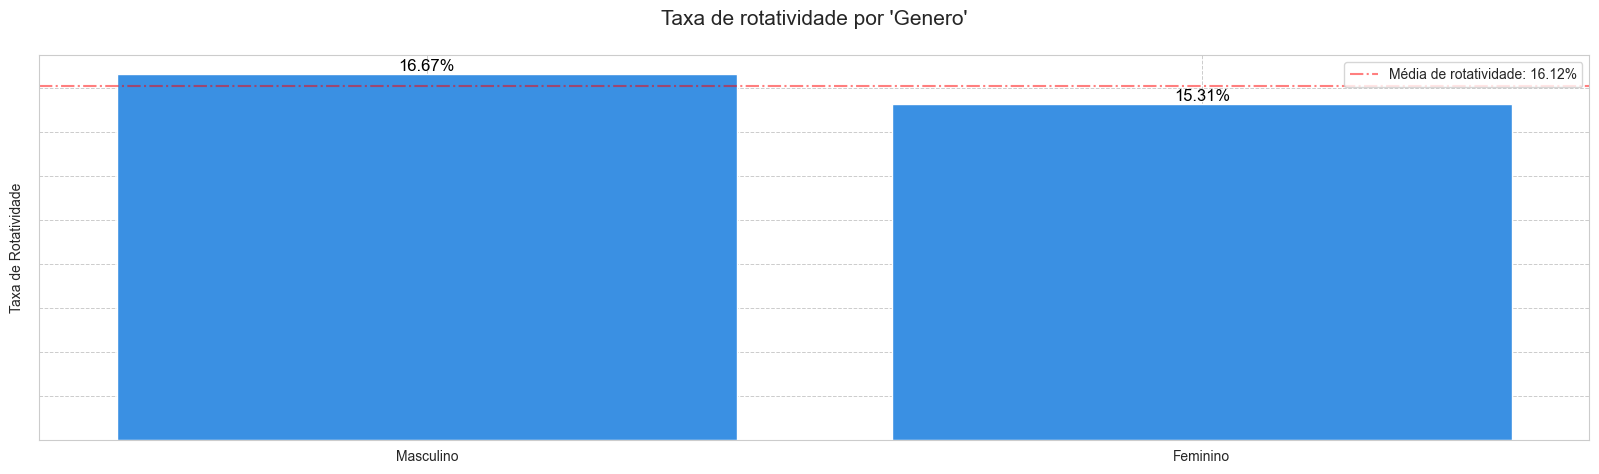

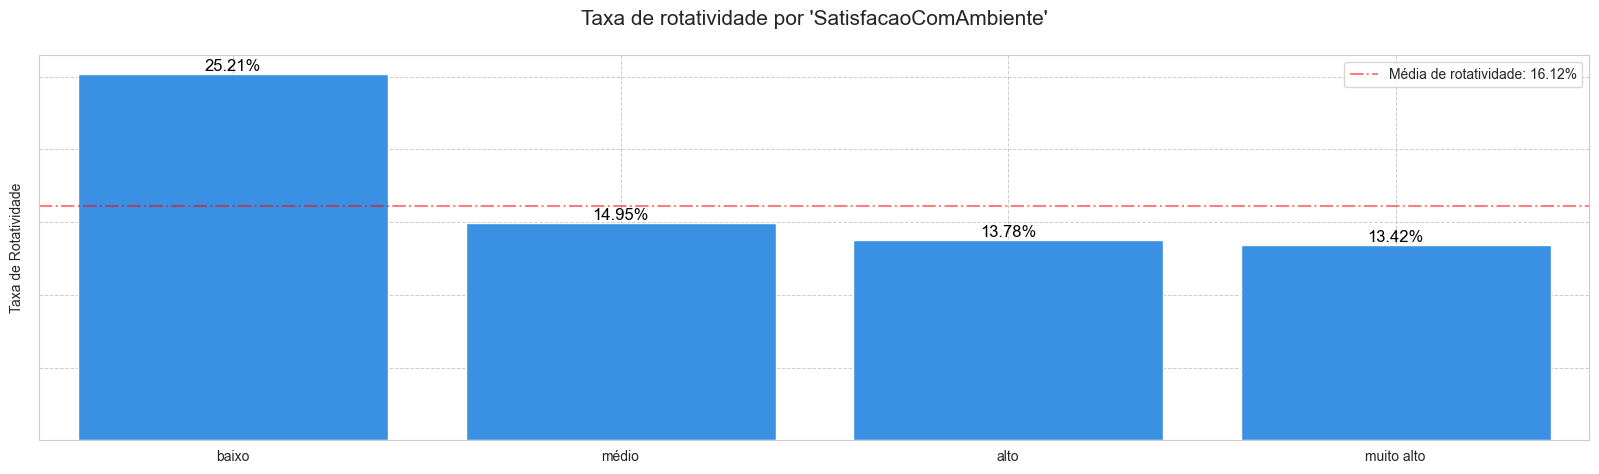

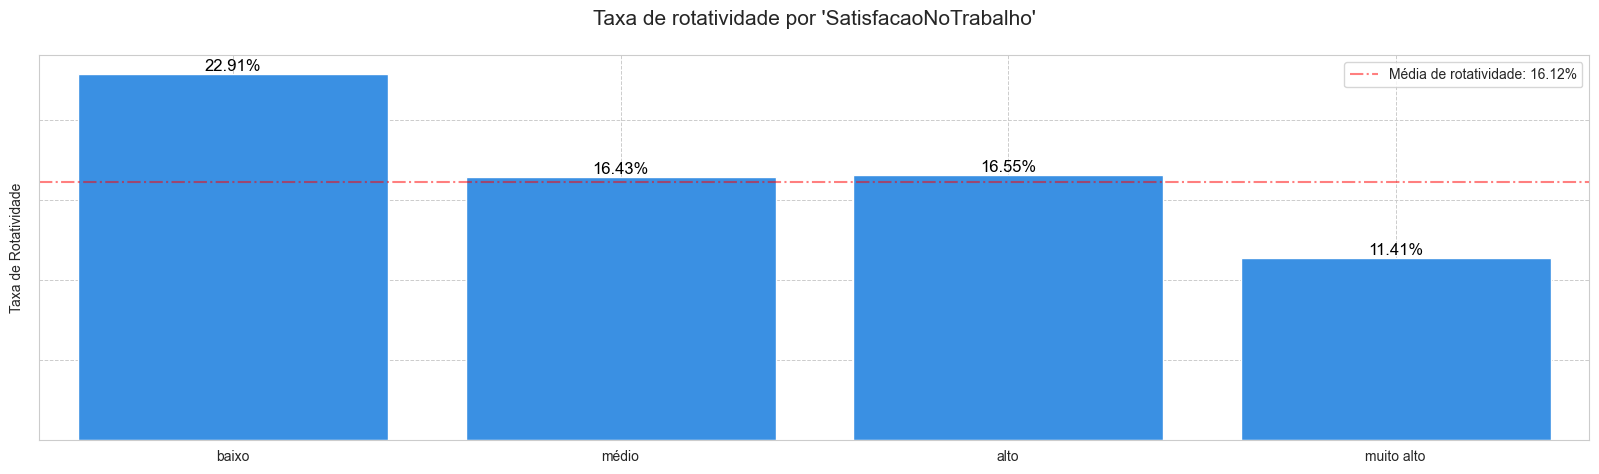

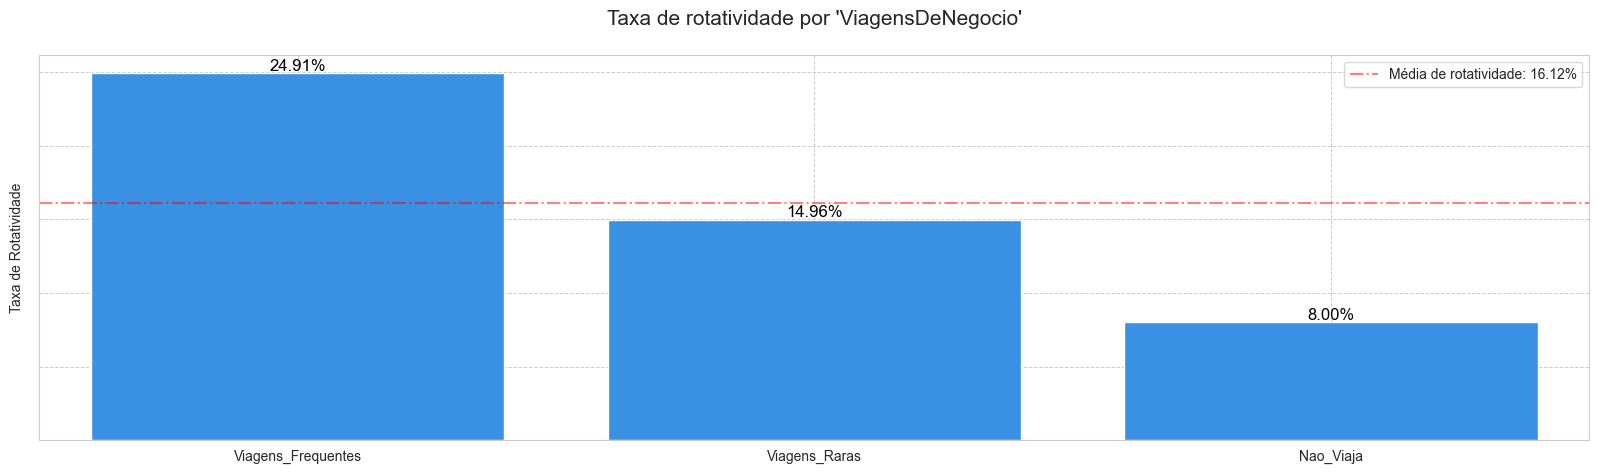

In [16]:
# Mapeamento de rótulos para variáveis específicas
mapa_rotulos = {
    'AvaliacaoDeDesempenho': ['excelente', 'excepcional'],
    'Educacao': ['abaixo do ensino superior', 'ensino superior incompleto', 'bacharel', 'mestre', 'doutor'],
    'EnvolvimentoNoTrabalho': ['baixo', 'médio', 'alto', 'muito alto'],
    'EquilibrioTrabalhoVida': ['ruim', 'bom', 'melhor', 'ótimo'],
    'SatisfacaoComAmbiente': ['baixo', 'médio', 'alto', 'muito alto'],
    'SatisfacaoNoTrabalho': ['baixo', 'médio', 'alto', 'muito alto']
}

# Calcular a taxa de rotatividade por variável categórica
for var in vars_categoricas:
    rotatividade_por_categoria = df.groupby(var)['TARGET'].mean()
    rotatividade_por_categoria = rotatividade_por_categoria.sort_values(
        ascending=False)

    # Criar o gráfico de barras
    plt.figure(figsize=(20, 5))
    plot = sns.barplot(x=rotatividade_por_categoria.index,
                       y=rotatividade_por_categoria.values, palette=['dodgerblue'])

    # Adicionar rótulos e título
    plot.set_title(f'Taxa de rotatividade por \'{var}\'\n', fontsize=15)
    plot.set(xlabel='', ylabel='Taxa de Rotatividade')
    plot.tick_params(axis='both', labelsize=10)

    # Adicionando linha horizontal para a média
    rotatividade_media = df['TARGET'].mean()
    plt.axhline(rotatividade_media, color='red', linestyle='-.', alpha=0.5,
                label=f'Média de rotatividade: {rotatividade_media:.2%}')

    # Removendo os valores do eixo y
    plot.set_yticklabels([])

    # Aplicando mapeamento de rótulos se existir
    if var in mapa_rotulos:
        plot.set_xticklabels(mapa_rotulos[var])

    # Adicionar valores sobre as barras
    for p in plot.patches:
        plot.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black')

    # Formatando grade do gráfico
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Adicionando a legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

**INSIGTHS**

- **Avaliação de Desempenho:** Todos os funcionários receberam as mais altas avaliações, contudo, observa-se também uma elevação na taxa de rotatividade, chegando a ultrapassar a média de 16,12%.
- **Campo de Educação:** Os funcionários com formação ou que estão se formando em _Recursos Humanos_ são os que mais deixaram a empresa, com uma taxa de 40,74%.
- **Departamento:** O departamento de _Recursos Humanos_ apresentou uma rotatividade de 30,16%, praticamente o dobro da média dos demais departamentos.
- **Educação:** A taxa de rotatividade de 18,79% pertence aos funcionários com _ensino superior incompleto_. Os demais níveis educacionais apresentam percentuais muito próximos entre si, variando de 15,58% a 14,58%.
- **Envolvimento no Trabalho:** Colaboradores com nível _baixo_ de envolvimento representam 21,69% de rotatividade. Aqueles com nível _muito alto_ apresentam uma rotatividade de 18,06%.
- **Equilíbrio Trabalho-Vida:** Um fenômeno semelhante ao envolvimento no trabalho ocorre aqui, com uma rotatividade de 31,38% para quem considera o equilíbrio _ruim_ e 17,84% para quem considera _ótimo_.
- **Estado Civil:** Funcionários solteiros apresentam a maior taxa de rotatividade, com 25,53%. Os demais estados civis estão bem abaixo da média de 16,12%.
- **Função:** O cargo de _Diretor de Pesquisa_ tem a maior rotatividade, com 23,75%, em contraste com o _Diretor de Manufatura_, que tem uma taxa de 11,03%.
- **Gênero:** Com uma diferença de 1,36 p.p., o gênero _Masculino_ apresenta uma taxa de rotatividade de 16,67%, enquanto o _Feminino_ tem uma taxa de 15,31%.
- **Satisfação com o Ambiente:** Funcionários que consideram a satisfação com o ambiente como _baixa_ têm uma rotatividade de 25,21%. Quanto maior o nível de satisfação, menor a taxa de rotatividade.
- **Satisfação no Trabalho:** Seguindo a mesma tendência, quanto mais baixa a satisfação no trabalho, maior a rotatividade. O nível _baixo_ está em 22,91%, enquanto o nível _muito alto_ está em 11,41%.
- **Viagens de Negócio:** Quanto maior a frequência de viagens, maior a rotatividade. Funcionários que fazem _viagens frequentes_ têm uma taxa de rotatividade de 24,91%, enquanto aqueles que não viajam têm uma taxa de apenas 8%.

### 5.2. Análise das variáveis numéricas

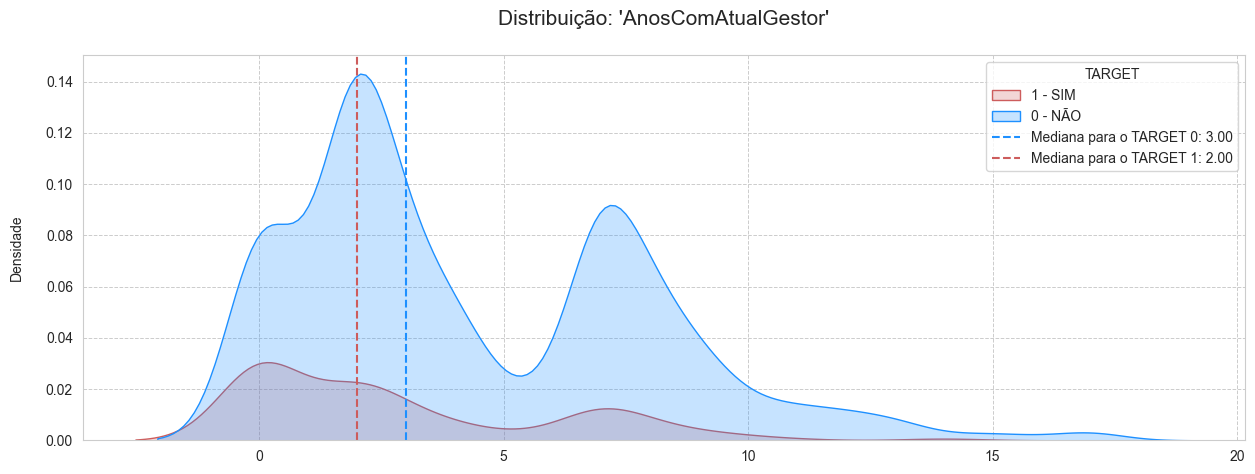

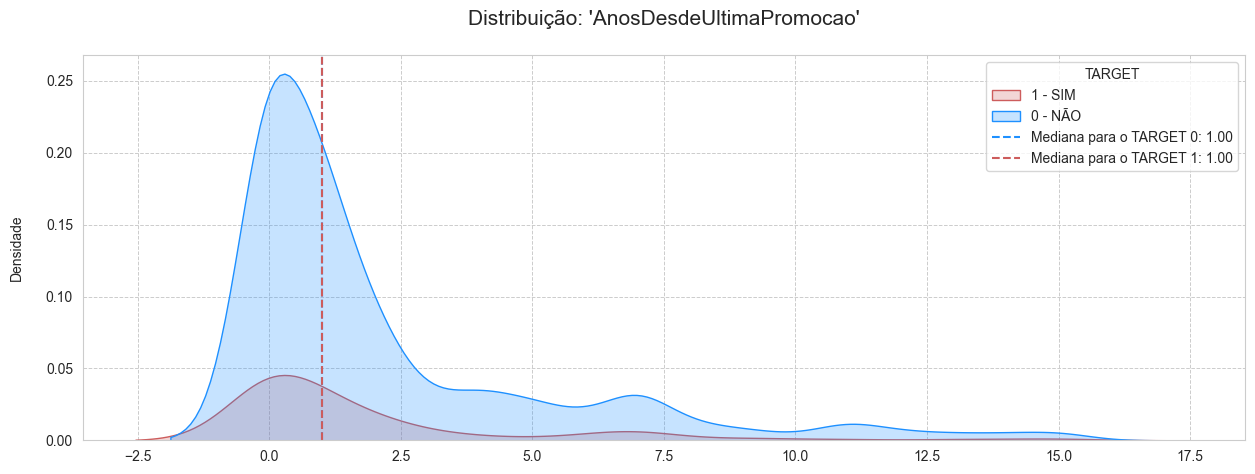

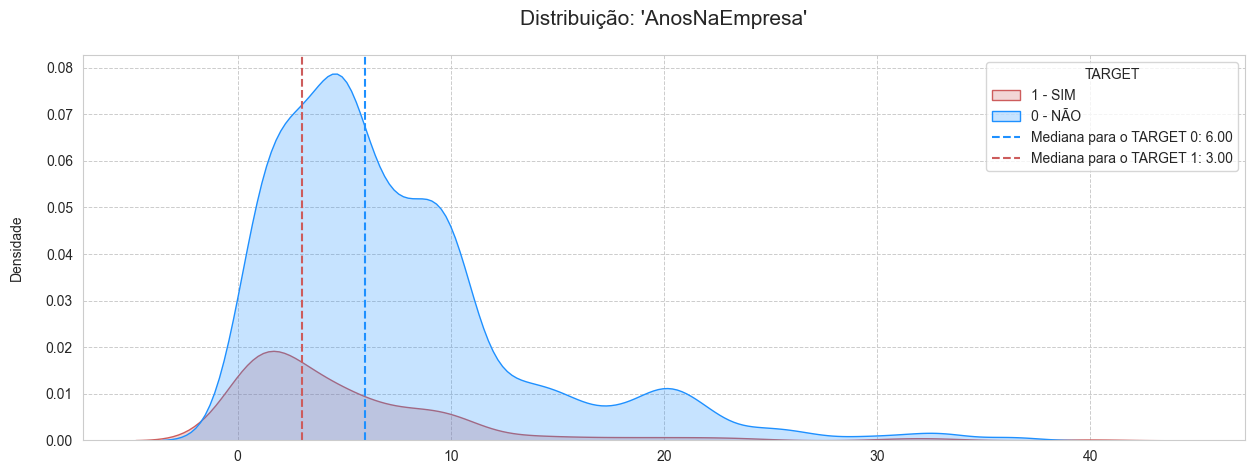

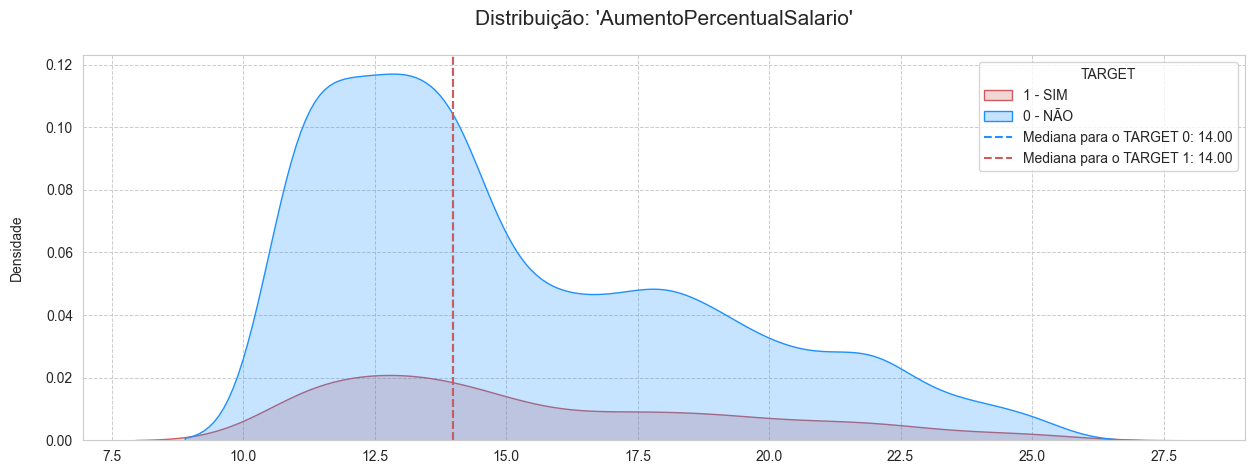

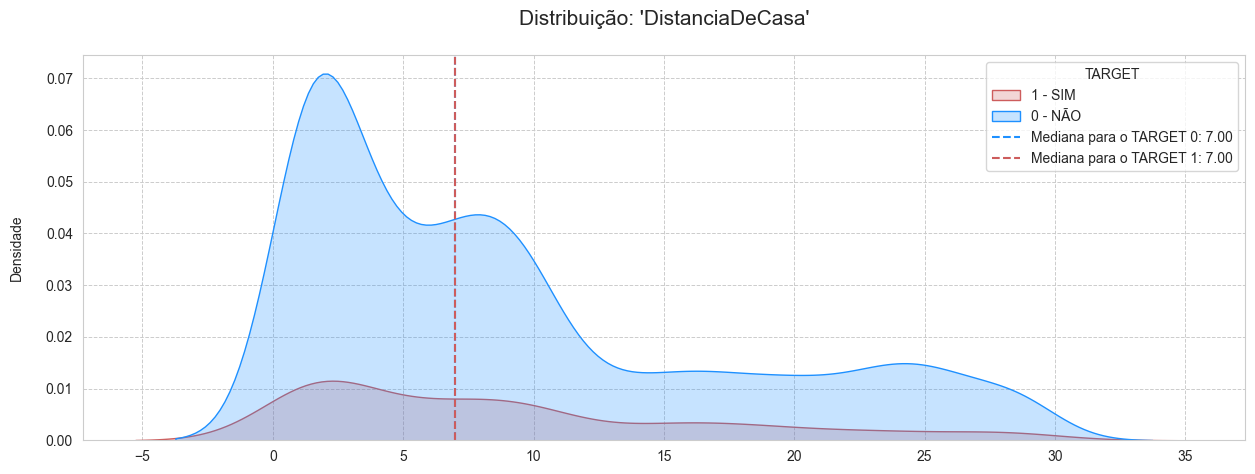

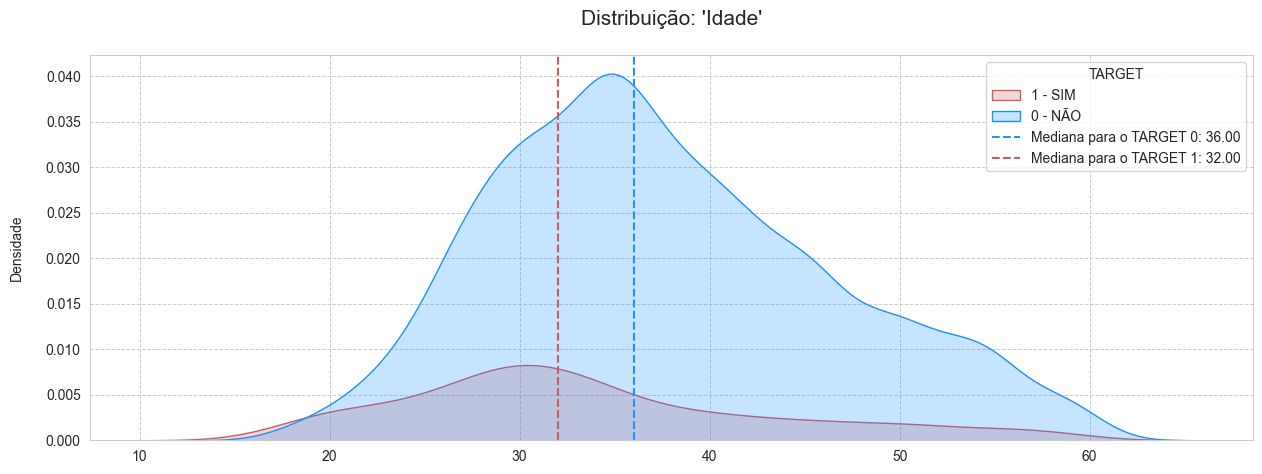

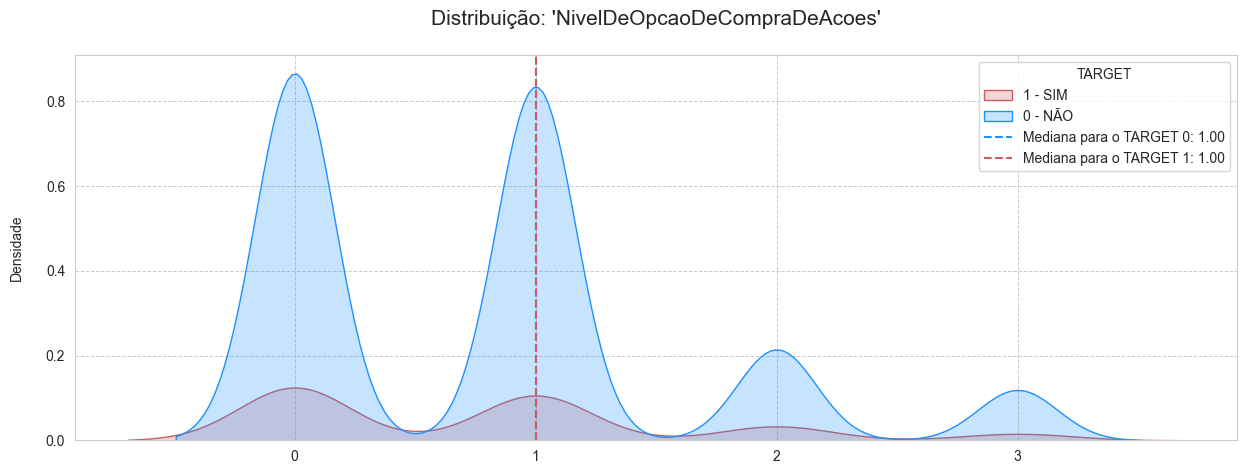

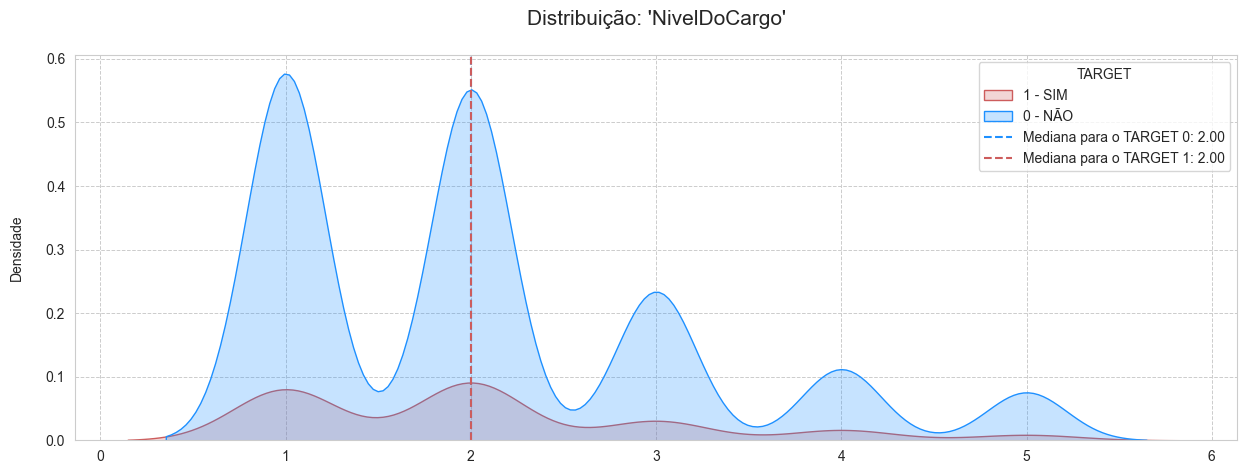

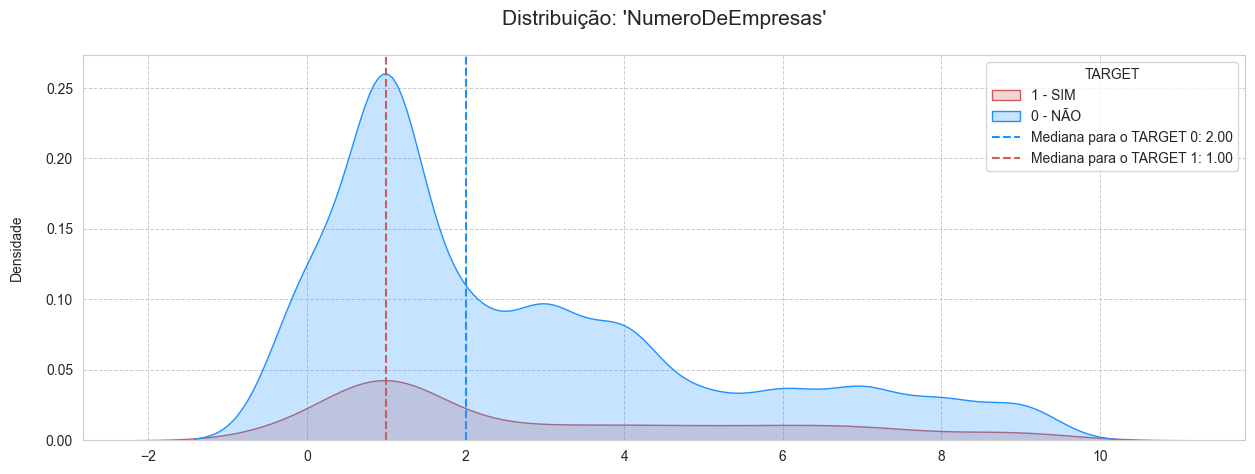

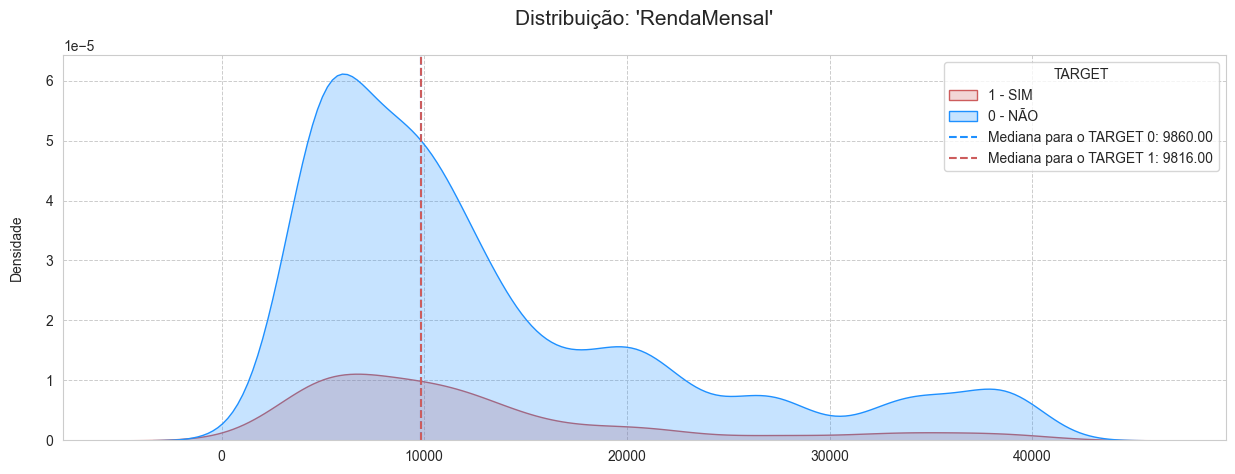

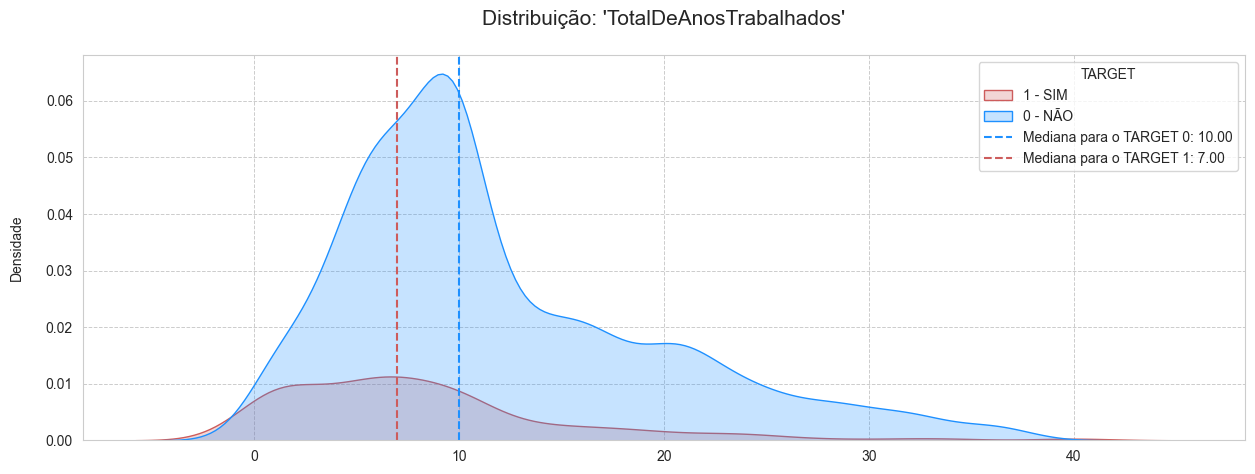

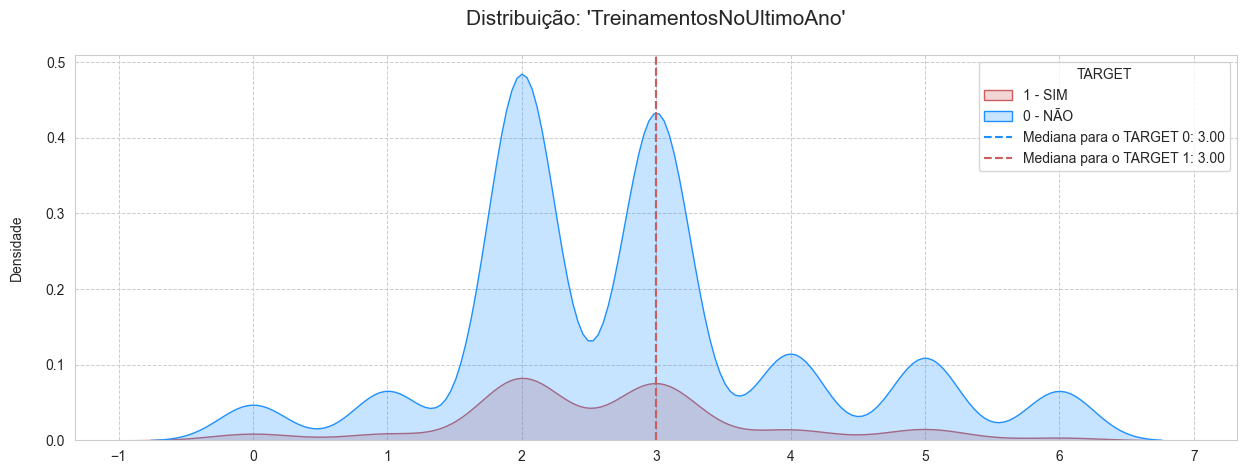

In [17]:
# Paleta de cores para uso no gráfico kde
palette = ['dodgerblue', 'indianred']

# Calcular a taxa de rotatividade por variável categórica
for var in vars_numericas:
    medianas = df.groupby('TARGET')[var].median()

    # Criar o gráfico de barras
    plt.figure(figsize=(15, 5))
    plot = sns.kdeplot(data=df, x=var, hue='TARGET', fill=True, palette=palette)

    # Adicionar rótulos e título
    plot.set_title(f'Distribuição: \'{var}\'\n', fontsize=15)
    plot.set(xlabel='', ylabel='Densidade\n')
    plot.tick_params(axis='both', labelsize=10)

    # Cria lista para armazenar valores das medianas
    val=[]
    
    # Adicionar linha vertical para a mediana de cada target da variável
    for target in df['TARGET'].unique():
        mediana = medianas[target]
        color = palette[target]
        val.append(mediana)
        plt.axvline(mediana, color=color, linestyle='--')

    # Formatando grade do gráfico
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Adicionando a legenda
    plt.legend(title='TARGET', loc='upper right', 
               labels=['1 - SIM', '0 - NÃO', 
                       f'Mediana para o TARGET 0: {val[0]:.2f}', 
                       f'Mediana para o TARGET 1: {val[1]:.2f}'])

    # Exibindo o gráfico
    plt.show()

**INSIGTHS**

- **AnosComAtualGestor**: Observa-se uma maior densidade nos primeiros anos, indicando uma maior rotatividade de funcionários durante os primeiros anos sob a supervisão do atual gestor.
- **AnosNaEmpresa**: Os primeiros anos na empresa são os mais críticos, apresentando um alto índice de rotatividade, que tende a diminuir conforme o tempo de permanência na empresa aumenta.
- **Idade**: A densidade é maior entre aproximadamente 26 e 36 anos, sugerindo que os colaboradores nessa faixa etária estão em transição de iniciantes para experientes em suas funções.
- **NumeroDeEmpresas**: Colaboradores que trabalharam em apenas uma empresa tendem a apresentar maior rotatividade.
- **TotalDeAnosTrabalhados**: A rotatividade de colaboradores aumenta até atingirem cerca de 7 anos de trabalho, indicando que este é um período crítico com maior propensão à saída.

Em relação às variáveis **AnosDesdeUltimaPromocao**, **AumentoPercentualSalario**, **DistanciaDeCasa**, **NivelDeOpcaoDeCompraDeAcoes**, **NivelDoCargo**, **RendaMensal** e **TreinamentosNoUltimoAno**, embora existam diferenças sutis nas distribuições e densidades em relação à variável TARGET, visualmente não há uma diferença significativa nos comportamentos de rotatividade. Isso é reforçado pelo fato de que as medianas são semelhantes para os funcionários que permaneceram na empresa (TARGET 0) e aqueles que saíram (TARGET 1), sugerindo tendências similares.

## 6. Obter a propabilidade de um funcionário sair da empresa

### 6.1. Split dos dados (treino e teste)

In [19]:
# Criação da ABT excluindo as colunas de identificação e alvo
abt = df.drop(columns=['IDDoEmpregado', 'Rotatividade', 'TARGET'])

# Atribuição a variável com o target e seus valores
target = df['TARGET']

# Divisão em treino 80% e teste 20%, 'random_state' garante a reprodução
# dos mesmos resultados sempre que o código for executado
X_train, X_test, y_train, y_test = train_test_split(abt, target, test_size=0.2, random_state=0)

<div style="text-align: right">
<h1>つづく...</h1>
<h2>continua...</h2>
</div>
